In [1]:
import pandas as pd
import numpy as np
import gseapy as gp
import matplotlib.pyplot as plt
from gseapy import barplot, dotplot
import seaborn as sns
from matplotlib import rcParams
import re

In [2]:
import os
os.chdir("/data/wuqinhua/scPhase/CRC")

In [3]:
import pandas as pd
def _df_append(self, other, ignore_index=False, verify_integrity=False, sort=False):
    return pd.concat([self, other], ignore_index=ignore_index, sort=sort, axis=0)
pd.DataFrame.append = _df_append

In [4]:
gene_df_H = pd.read_csv("./ensemble_gene_attributions_normal.csv")
top_genes_H = gene_df_H.sort_values('mean_attribution', ascending=False)['gene'].head(100).tolist()
enr_H=gp.enrichr(gene_list=top_genes_H,gene_sets=['GO_Biological_Process_2025','KEGG_2021_Human','Reactome_Pathways_2024'],organism='Human',outdir='/home/wuqinhua/Project/PHASE_1r/AttnMoE_test/result/CRC/Analysis/Figure/GSEA_plot',cutoff=1)

gene_df_M = pd.read_csv("./ensemble_gene_attributions_MMRd.csv")
top_genes_M = gene_df_M.sort_values('mean_attribution', ascending=False)['gene'].head(100).tolist()
enr_M=gp.enrichr(gene_list=top_genes_M,gene_sets=['GO_Biological_Process_2025','KEGG_2021_Human','Reactome_Pathways_2024'],organism='Human',outdir='/home/wuqinhua/Project/PHASE_1r/AttnMoE_test/result/CRC/Analysis/Figure/GSEA_plot',cutoff=1)

gene_df_S = pd.read_csv("./ensemble_gene_attributions_MMRp.csv")
top_genes_S = gene_df_S.sort_values('mean_attribution', ascending=False)['gene'].head(100).tolist()
enr_S=gp.enrichr(gene_list=top_genes_S,gene_sets=['GO_Biological_Process_2025','KEGG_2021_Human','Reactome_Pathways_2024'],organism='Human',outdir='/home/wuqinhua/Project/PHASE_1r/AttnMoE_test/result/CRC/Analysis/Figure/GSEA_plot',cutoff=1)


In [5]:
enr_H_results = enr_H.results.copy()
enr_H_results['Group'] = 'Normal'

enr_M_results = enr_M.results.copy()
enr_M_results['Group'] = 'MMRd'

enr_S_results = enr_S.results.copy()
enr_S_results['Group'] = 'MMRp'

In [6]:
combined_results = pd.concat([enr_H_results, enr_M_results, enr_S_results], ignore_index=True)
significant_results = combined_results[combined_results['Adjusted P-value'] < 0.05]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

=== GO Biological Process Top 10 通路热图 ===


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

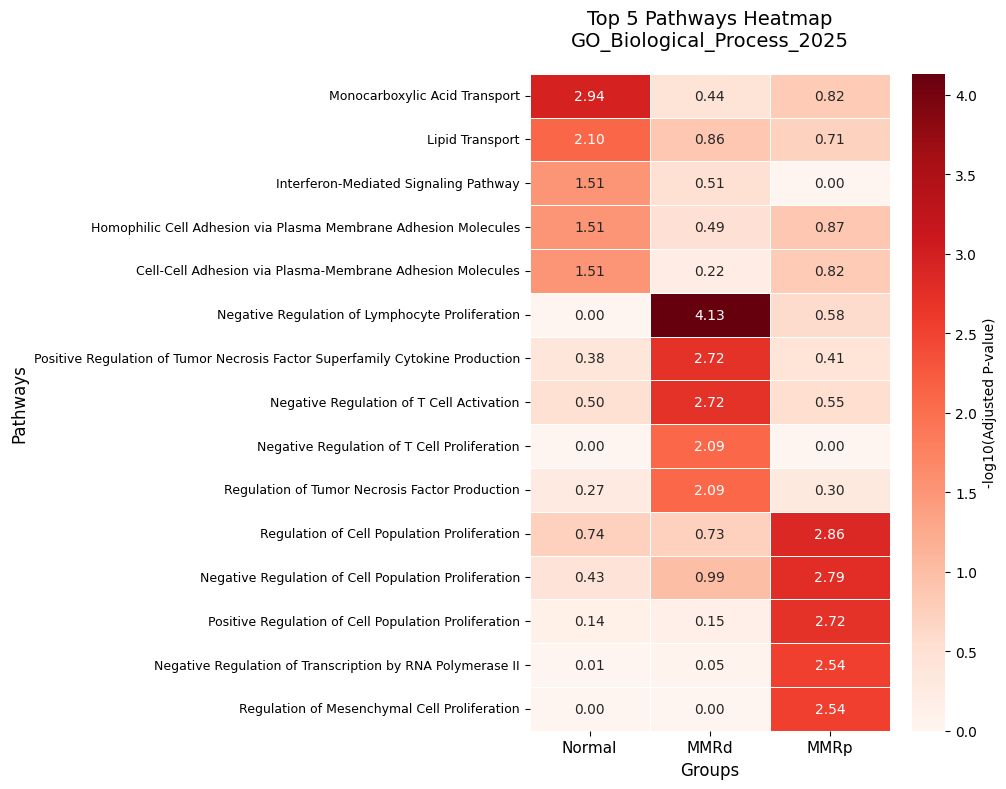

In [7]:
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.unicode_minus'] = False

def create_top_pathways_heatmap(enr_H, enr_M, enr_S, gene_set_filter='GO_Biological_Process_2025', top_n=10):

    def get_top_pathways(enr_result, gene_set, n=top_n):
        df = enr_result.results.copy()
        df_filtered = df[(df['Gene_set'] == gene_set) & (df['Adjusted P-value'] < 0.05)]
        top_pathways = df_filtered.nsmallest(n, 'Adjusted P-value')
        return top_pathways[['Term', 'Adjusted P-value', 'Odds Ratio']]
    
    h_top = get_top_pathways(enr_H, gene_set_filter, top_n)
    m_top = get_top_pathways(enr_M, gene_set_filter, top_n)
    s_top = get_top_pathways(enr_S, gene_set_filter, top_n)
    
    all_pathways = pd.concat([h_top['Term'], m_top['Term'], s_top['Term']]).unique()

    heatmap_data = pd.DataFrame(index=all_pathways, columns=['Normal', 'MMRd', 'MMRp'])

    for pathway in all_pathways:
        h_match = h_top[h_top['Term'] == pathway]
        if len(h_match) > 0:
            heatmap_data.loc[pathway, 'Normal'] = -np.log10(h_match['Adjusted P-value'].iloc[0])
        else:
            h_all = enr_H.results[(enr_H.results['Gene_set'] == gene_set_filter) & 
                                 (enr_H.results['Term'] == pathway)]
            if len(h_all) > 0:
                heatmap_data.loc[pathway, 'Normal'] = -np.log10(h_all['Adjusted P-value'].iloc[0])
            else:
                heatmap_data.loc[pathway, 'Normal'] = 0

        m_match = m_top[m_top['Term'] == pathway]
        if len(m_match) > 0:
            heatmap_data.loc[pathway, 'MMRd'] = -np.log10(m_match['Adjusted P-value'].iloc[0])
        else:
            m_all = enr_M.results[(enr_M.results['Gene_set'] == gene_set_filter) & 
                                 (enr_M.results['Term'] == pathway)]
            if len(m_all) > 0:
                heatmap_data.loc[pathway, 'MMRd'] = -np.log10(m_all['Adjusted P-value'].iloc[0])
            else:
                heatmap_data.loc[pathway, 'MMRd'] = 0

        s_match = s_top[s_top['Term'] == pathway]
        if len(s_match) > 0:
            heatmap_data.loc[pathway, 'MMRp'] = -np.log10(s_match['Adjusted P-value'].iloc[0])
        else:
            s_all = enr_S.results[(enr_S.results['Gene_set'] == gene_set_filter) & 
                                 (enr_S.results['Term'] == pathway)]
            if len(s_all) > 0:
                heatmap_data.loc[pathway, 'MMRp'] = -np.log10(s_all['Adjusted P-value'].iloc[0])
            else:
                heatmap_data.loc[pathway, 'MMRp'] = 0
    
    heatmap_data = heatmap_data.astype(float)
    
    plt.figure(figsize=(10, max(8, len(all_pathways) * 0.15)))
    
    ax = sns.heatmap(heatmap_data, 
                     annot=True,
                     fmt='.2f',
                     cmap='Reds',
                     cbar_kws={'label': '-log10(Adjusted P-value)'},
                     linewidths=0.5,
                     linecolor='white')

    plt.title(f'Top {top_n} Pathways Heatmap\n{gene_set_filter}', fontsize=14, pad=20)
    plt.xlabel('Groups', fontsize=12)
    plt.ylabel('Pathways', fontsize=12)

    cleaned_pathway_labels = [re.sub(r'\s*\([^)]*\)$', '', pathway).strip() 
                              for pathway in heatmap_data.index]
    ax.set_yticklabels(cleaned_pathway_labels, rotation=0, fontsize=9)
    
    ax.set_xticklabels(['Normal', 'MMRd', 'MMRp'], rotation=0, fontsize=11)
    
    plt.tight_layout()
    plt.savefig(f"./Analysis/Figure/GSEA_plot/top_{top_n}_pathways_heatmap_{gene_set_filter}_100.pdf", dpi=300, bbox_inches='tight')

    plt.show()
    
    return heatmap_data, all_pathways

print("=== GO Biological Process Top 10 通路热图 ===")
heatmap_go, pathways_go = create_top_pathways_heatmap(enr_H, enr_M, enr_S, 
                                                     'GO_Biological_Process_2025', 
                                                     top_n=5)                           
